In [2]:
import numpy as np
import pandas as pd
import risk_tools as rt

%matplotlib inline
%load_ext autoreload
%autoreload 2


GHP Construction with Duration Matching

In [3]:
rt.bond_cash_flows(3, 100, 0.03, 2)

1      1.5
2      1.5
3      1.5
4      1.5
5      1.5
6    101.5
dtype: float64

In [4]:
rt.bond_price(20, 1000, 0.05, 2, 0.04)

1136.7773962036904

In [5]:
rt.bond_price(20, 1000, 0.05, 2, 0.05)


1000.0000000000023

In [6]:
rt.bond_price(20, 1000, 0.05, 2, 0.02)


1492.520291709342

In [7]:
rates = np.linspace(.01, .10, num=20)
rates

array([0.01      , 0.01473684, 0.01947368, 0.02421053, 0.02894737,
       0.03368421, 0.03842105, 0.04315789, 0.04789474, 0.05263158,
       0.05736842, 0.06210526, 0.06684211, 0.07157895, 0.07631579,
       0.08105263, 0.08578947, 0.09052632, 0.09526316, 0.1       ])

In [8]:
prices = [rt.bond_price(10, 1000, .05, 2, rate) for rate in rates]
prices

[1379.7483829333992,
 1326.7629283179222,
 1276.1632981372743,
 1227.833537616068,
 1181.6636507727876,
 1137.5492793724407,
 1095.3913999300185,
 1055.0960377089511,
 1016.5739967228162,
 979.7406048086303,
 944.5154728963505,
 910.8222676519945,
 878.5884967212596,
 847.74530584692,
 818.2272871767957,
 789.9722981198867,
 762.9212901465673,
 737.0181469646424,
 712.209531536784,
 688.4447414365]

<AxesSubplot:title={'center':'Price of 10 y bond with diff interest rates'}>

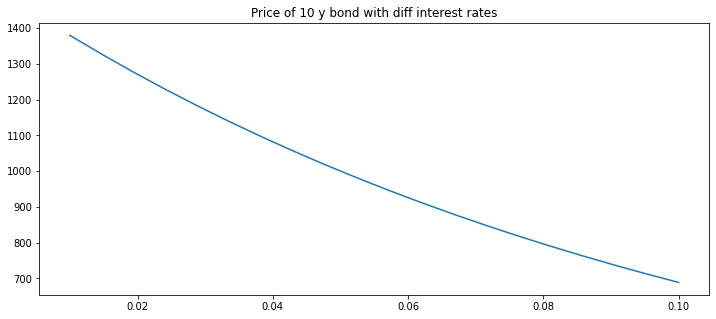

In [9]:
pd.DataFrame(data=prices, index=rates).plot(title='Price of 10 y bond with diff interest rates', legend=False, figsize=(12, 5))

In [10]:
cf = rt.bond_cash_flows(3, 1000, .06, 2)
cf

1      30.0
2      30.0
3      30.0
4      30.0
5      30.0
6    1030.0
dtype: float64

In [11]:
discounts = rt.discount(cf.index, .06/2)
discounts

Float64Index([ 0.970873786407767, 0.9425959091337544, 0.9151416593531595,
              0.8884870479156888, 0.8626087843841639, 0.8374842566836542],
             dtype='float64')

In [12]:
dcf = discounts * cf
dcf

1     29.126214
2     28.277877
3     27.454250
4     26.654611
5     25.878264
6    862.608784
dtype: float64

In [13]:
weights = dcf / dcf.sum()
weights

1    0.029126
2    0.028278
3    0.027454
4    0.026655
5    0.025878
6    0.862609
dtype: float64

In [14]:
(cf.index * weights).sum()

5.579707187194534

In [15]:
rt.macaulay_duration(rt.bond_cash_flows(3, 1000, 0.06, 2), .06/2)

5.579707187194534

### Duration Matching

In [16]:
liabilites = pd.Series(data=[10000, 10000], index=[10, 12])
rt.macaulay_duration(liabilites, .04)

10.960799385088393

In [17]:
md_10 = rt.macaulay_duration(rt.bond_cash_flows(10, 1000, 0.05, 1), .04)
md_20 = rt.macaulay_duration(rt.bond_cash_flows(20, 1000, 0.05, 1), .04)


In [18]:
md_10, md_20

(8.190898824083233, 13.544718122145921)

In [19]:
short_bond = rt.bond_cash_flows(10, 1000, .05, 1)
long_bond = rt.bond_cash_flows(20, 1000, .05, 1)
w_s = rt.match_durations(liabilites, short_bond, long_bond, .04)
w_s


0.48263092069478974

In [20]:
p_short = rt.bond_price(10, 1000, .05, 1, .04)
p_long = rt.bond_price(20, 1000, .05, 1, .04)
a_0 = 130000
p_flows = pd.concat([a_0 * w_s * short_bond/p_short,
                    a_0 * (1-w_s) * long_bond/p_long])

rt.macaulay_duration(p_flows, .04)



10.960799385088393

In [21]:
cfr = rt.funding_ratio(p_flows, liabilites, .04)
cfr

9.998760012192477

In [22]:
rates = np.linspace(0, .1, 20)
rates

array([0.        , 0.00526316, 0.01052632, 0.01578947, 0.02105263,
       0.02631579, 0.03157895, 0.03684211, 0.04210526, 0.04736842,
       0.05263158, 0.05789474, 0.06315789, 0.06842105, 0.07368421,
       0.07894737, 0.08421053, 0.08947368, 0.09473684, 0.1       ])

<AxesSubplot:title={'center':'Funding Ratious with changes in Interest Rates'}>

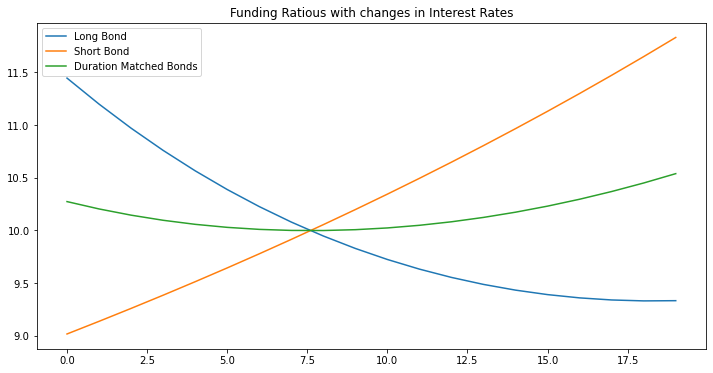

In [25]:
rates = np.linspace(0, .1, 20)


lb_assets = a_0 * long_bond / p_long
sb_assets = a_0 * short_bond / p_short

fr_change = pd.DataFrame({
    "Long Bond": [rt.funding_ratio(lb_assets, liabilites, r) for r in rates],
    "Short Bond": [rt.funding_ratio(sb_assets, liabilites, r) for r in rates],
    "Duration Matched Bonds": [rt.funding_ratio(p_flows, liabilites, r) for r in rates]
})

fr_change.plot(title='Funding Ratious with changes in Interest Rates', figsize=(12, 6))